In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])
df = pd.DataFrame(data, columns=["X","Y", "Z"])

In [ ]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.8
7,1.1,0.9,0.2


In [ ]:
#Step 2: Standardization using pandas (avoids NaN issues)
standardized_data = (df - df.mean())/ df.std()

In [ ]:
#Step 3: Covariance matrix
cov_matrix = np.cov(standardized_data.T)

In [ ]:
#Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
#Step 5: Sort eigenvalues and eigenvalues
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [ ]:
#Step 6: Select top 2 eigenvaectors
eig_vecs_subset = eig_vecs[:, :2]

In [ ]:
#Step 7: Project data to new basis
reduced_data=standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df=pd.DataFrame(reduced_data,columns=["PC1","PC2"])
display(reduced_df)


,PC1,PC2
0,0.797797,0.269462
1,-2.662107,-0.325190
2,1.127610,-0.407997
3,0.142725,-0.173389
4,2.138351,0.243502
5,1.172477,-0.284356
6,-0.497891,0.419061
7,-2.218963,0.258907


In [ ]:
#Step 8: output the reduced data
print("\nReduced Data (after PCA): \n", reduced_df)


Reduced Data (after PCA): 
         PC1       PC2
0  0.797797  0.269462
1 -2.662107 -0.325190
2  1.127610 -0.407997
3  0.142725 -0.173389
4  2.138351  0.243502
5  1.172477 -0.284356
6 -0.497891  0.419061
7 -2.218963  0.258907


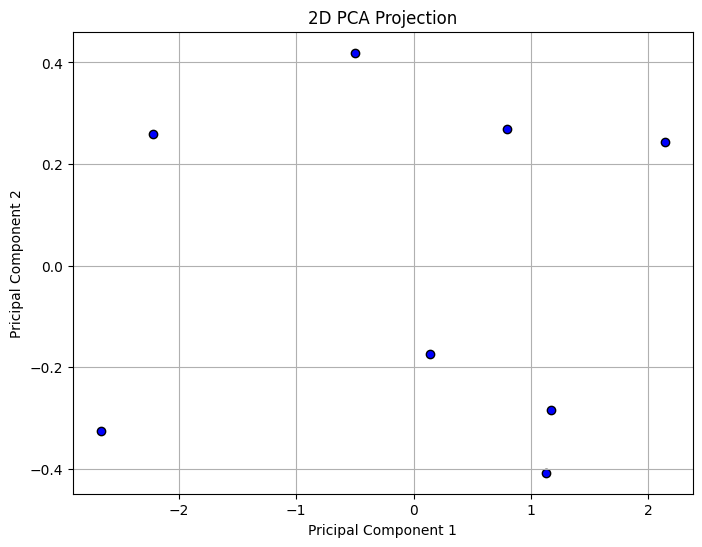

In [ ]:
#Step 9: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color = 'blue', edgecolor ='k')
plt.title('2D PCA Projection')
plt.xlabel('Pricipal Component 1')
plt.ylabel('Pricipal Component 2')
plt.grid(True)
plt.show()